### 뉴럴 네트워크를 구현하는데 필요한 라이브러리를 import 한다.

In [0]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn

gpu를 사용할 수 있는지 없는지 확인해주는 함수

In [0]:
torch.cuda.is_available()

True

사용할 수 있는 gpu의 수 

In [0]:
torch.cuda.device_count()

1

gpu를 사용하기 위해 device를 할당한다.

In [0]:
device = torch.device('cuda')

Tensor 만들기

In [0]:
a = torch.FloatTensor([[2,3,4,5]])

In [0]:
a

tensor([[2., 3., 4., 5.]])

In [0]:
torch.FloatTensor([2,3,4,5])

tensor([2., 3., 4., 5.])

In [0]:
a = np.array([[2,3,4,5]])

numpy array -> torch Tensor

In [0]:
a = torch.from_numpy(a)
a

tensor([[2, 3, 4, 5]])

In [0]:
b = np.array([[3,4,5,6]])
b

array([[3, 4, 5, 6]])

넘파이의 모양을 확인하고 변경하는 방법

In [0]:
b.shape

(1, 4)

In [0]:
b.reshape(2,2)

array([[3, 4],
       [5, 6]])

Tensor는 size()로 확인하고, view로 모양을 바꾼다.
- flatten()을 사용하면 벡터 형태로 펼쳐준다.

In [0]:
a.view(2,2).flatten()

tensor([2, 3, 4, 5])

shape를 맞춰줄 때 사용하기 유용한 메서드들
> unsqueeze() : 차원 추가

> squeeze(): 차원 압축

In [0]:
a.shape

torch.Size([1, 4])

In [0]:
a.unsqueeze(1).shape

torch.Size([1, 1, 4])

In [0]:
a.unsqueeze(1).squeeze(0).shape

torch.Size([1, 4])

size(idx) 로 특정 차원의 크기를 뽑을 수 있다.

In [0]:
a.size(0)

1

Tensor를 cuda(gpu)에 얹는다.

In [0]:
a = torch.cuda.FloatTensor([0, -10, -1, -1])
a

tensor([  0., -10.,  -1.,  -1.], device='cuda:0')

gpu를 얼마나 사용하는지 궁금하다면 다음과 같은 방법으로 확인할 수 있다.

In [0]:
!nvidia-smi

Mon Aug 12 13:10:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |    771MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Linear한 NeuralNetwork를 만들어보자

- Linear(input, output)

In [0]:
linear = nn.Linear(4,1)

In [0]:
x = torch.FloatTensor([0,1,1,1])

In [0]:
linear(x)

tensor([0.7082], grad_fn=<AddBackward0>)

neural network에서 각 노드의 가중치를 확인 할 수 있다.

In [0]:
linear.weight

Parameter containing:
tensor([[ 0.4241, -0.0110,  0.1188,  0.3466]], requires_grad=True)

In [0]:
linear = nn.Linear(4,10)
linear(x)

tensor([ 1.1927, -0.0906,  0.9266, -0.6678,  0.2183,  0.0761, -0.6019, -0.0789,
        -0.2328, -0.9423], grad_fn=<AddBackward0>)

In [0]:
x = torch.FloatTensor([0,-10,-1,-1])

### Sigmoid
- sigmoid는 0~1 사이인 Activation Function이다.
- gradient vanishing 문제가 있다.
- 양수 이므로 양의 방향으로만 갈 수 있다. 
- 지수함수를 계산해야 하므로 계산비용이 많이 든다.

In [0]:
F.sigmoid(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([0.0115, 0.0161, 0.0036, 0.5837, 0.1279, 0.0314, 0.7872, 0.0656, 0.0253,
        0.9812], grad_fn=<SigmoidBackward>)

### Tanh
- tanh는 sigmoid가 0점이 맞지 않아 양의 방향으로만 이동할 수 있으므로 0점을 맞춰주게 만든 것이다. 
- 범위는 -1 ~ 1이다.
- 여전히 gradient vanishin 문제가 발생한다.

In [0]:
F.tanh(linear(x))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor([-0.9997, -0.9995, -1.0000,  0.3257, -0.9579, -0.9979,  0.8638, -0.9902,
        -0.9987,  0.9993], grad_fn=<TanhBackward>)

### Softmax
- 입력 받은 값을 모든 출력의 합이 1이 되는 0~1 값으로 만들어주는 함수.
- 출력 레이어 바로 앞의 산경망 레이어를 통해 구현된다.
- 소프트맥스 레이어의 노드 수는 출력 레이어와 같아야한다.

In [0]:
F.softmax(linear(x), dim=0)

tensor([2.0114e-04, 2.8406e-04, 6.1833e-05, 2.4314e-02, 2.5430e-03, 5.6264e-04,
        6.4134e-02, 1.2169e-03, 4.4927e-04, 9.0623e-01],
       grad_fn=<SoftmaxBackward>)

In [0]:
F.softmax(linear(x), dim=0).sum()

tensor(1.0000, grad_fn=<SumBackward0>)

### sklearn의 fetch_california_housing 데이터로 연습해보자.

In [0]:
from sklearn.datasets import fetch_california_housing

In [0]:
data = fetch_california_housing()

sklearn.utils.Bunch를 dir해보면 다음과 같이 나온다.

- DESCR : 데이터셋에 대한 설명
- data: ndarray형식의 데이터
- feature_names : 속성 이름들
- target: 타겟 데이터(레이블)

In [0]:
dir(data), type(data)

(['DESCR', 'data', 'feature_names', 'target'], sklearn.utils.Bunch)

In [0]:
data.data.shape

(20640, 8)

In [0]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [0]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

matplotlib으로 데이터를 그려서 확인해보자.

In [0]:
import matplotlib.pyplot as plt

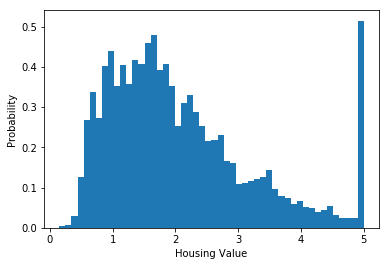

In [0]:
n, bins, patches = plt.hist(data.target, 50, density=True)
plt.xlabel('Housing Value')
plt.ylabel('Probability')
plt.show()

trainset과 testset을 나눈다.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(data.data, data.target, test_size=0.2)
X_train.shape

(16512, 8)

데이터는 정규화(Normalize)를 해준다.
- y값의 경우에는 5에 큰 값이 있으므로 정규화가 필요하다.
- 표준화를 하게 되면 평균과 표준에 5가 많은 영향을 미치기 때문에 정규화(min max scale)해준다.


In [0]:
min_, max_ = y_train.min(), y_train.max()

y_train = (y_train - min_)/(max_ - min_)
y_train

array([0.55010289, 0.25257834, 0.18391883, ..., 0.30412452, 0.25319689,
       0.25670203])

data.data 값은 StandardScaler를 이용하여 표준화 해준다.

> 정규화와 표준화를 해주는 이유는 outlier에 덜 영향을 받게하고, 학습을 더 효율적으로 할 수 있게 해준다. 
- 딥러닝이 안정적으로 학습할 수 있다. 

In [0]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
std_scaler.mean_ # 8개의 feature에 대하여 평균 값을 알 수 있다.

array([ 3.86423012e+00,  2.85882994e+01,  5.43043421e+00,  1.09683556e+00,
        1.42841594e+03,  2.98554144e+00,  3.56264474e+01, -1.19564140e+02])

In [0]:
X_train = std_scaler.transform(X_train)

테스트 데이터는 train 데이터로 fit 시킨 같은 scaler로 scaling 해준다. 

In [0]:
X_test = std_scaler.transform(X_test)

In [0]:
X_train

array([[ 0.90284063,  0.27044191,  0.36242397, ..., -0.09089849,
        -0.87442521,  0.8762163 ],
       [-1.19444881, -0.12590282, -1.06147364, ...,  0.01158789,
        -0.72919111,  0.66142557],
       [-1.04744006, -0.12590282,  0.17368634, ..., -0.03693737,
         1.55238977, -0.19773733],
       ...,
       [-0.72402081,  1.85582084, -0.24498479, ...,  0.32651275,
         0.79810944, -1.16679317],
       [-0.3721551 ,  0.90459348, -0.60903722, ...,  0.12430298,
        -0.77135585,  0.61147424],
       [ 0.0834128 , -0.99786123, -0.42489948, ..., -0.18894881,
        -0.87911018,  0.8612309 ]])

### 준비한 데이터를 Tensor로 바꿔더 데이터 셋을 준비한다.

In [0]:
X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)

# numpy의 float는 float 64이고,
# torch의 float는 float32여서 후에 에러가 난다.
X_train, y_train = X_train.float(), y_train.float()
X_test, y_test = X_test.float(), y_test.float()

In [0]:
y_train, y_test = y_train.view(-1,1), y_test.view(-1,1) # 2차원으로 변환해준다.

In [0]:
from torch.utils.data import TensorDataset, DataLoader

In [0]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

### 모델 정의
- 모델은 torch.nn.Module을 꼭 상속 받아야한다.
- \_\_init__()과 forward()는 무조건 재정의(overriding) 해야한다.

In [0]:
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim): # input_dim은 feature수를 맞춰줘야한다.
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        self.linear1 = nn.Linear(self.input_dim, hidden_dim)
        self.linear2 = nn.Linear(self.hidden_dim, 1)
        
    def forward(self, x):
        z1 = self.linear1(x)
        a1 = torch.relu(z1)
        z2 = self.linear2(a1)
        a2 = torch.sigmoid(z2) # 정규화 결과 0~1 (y_train을 정규화 시켰었음)
        return a2

In [0]:
model = Model(8,32).to(device)

mse_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

학습을 시킨다

In [0]:
epochs = 10

model.train()

for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        
        loss = mse_loss(predict, batch_y)
        
        # 이전 가중치를 초기화
        optimizer.zero_grad()
        # 가중치별로 gradient 계산
        loss.backward()
        # 계산한 가중치로 모델 업데이트(적용)
        optimizer.step()
        
        if i % 200 == 0:
            loss = loss.item()
            print(f"{e}, {i} - {loss}")

0, 0 - 0.06024446338415146
0, 200 - 0.02710741199553013
0, 400 - 0.03207741677761078
1, 0 - 0.009991991333663464
1, 200 - 0.022432725876569748
1, 400 - 0.014252042397856712
2, 0 - 0.024562880396842957
2, 200 - 0.015989534556865692
2, 400 - 0.010215846821665764
3, 0 - 0.016719529405236244
3, 200 - 0.014277635142207146
3, 400 - 0.010240472853183746
4, 0 - 0.013331815600395203
4, 200 - 0.00561302388086915
4, 400 - 0.011921905912458897
5, 0 - 0.014876969158649445
5, 200 - 0.030988242477178574
5, 400 - 0.008802986703813076
6, 0 - 0.02267391048371792
6, 200 - 0.004476603586226702
6, 400 - 0.011380057781934738
7, 0 - 0.008687714114785194
7, 200 - 0.013305948115885258
7, 400 - 0.01967448554933071
8, 0 - 0.014974867925047874
8, 200 - 0.015256810933351517
8, 400 - 0.011425806209445
9, 0 - 0.010613483376801014
9, 200 - 0.018030758947134018
9, 400 - 0.03839049115777016


### 학습시킨 모델의 성능을 테스트 하기 위해 테스트 데이터로 테스트를 실행한다. 

- 테스트 시에는 학습시킬 때 사용되는 gradient를 사용하지 않는다고 선언함으로써 gpu사용을 줄이고 모델이 학습되지 않게 할 수 있다. 

In [0]:
#L1Loss(절대값의 차이의 평균)
l1_loss = nn.L1Loss()
test_num = 0
total_loss = []

with torch.no_grad(): # 테스트 모드로, gradient 측정을 하지 않겠다 선언
    model.eval() # 테스트 모드로 모델을 사용하겠다.
    
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        
        # normalize해서 학습을 시켰으므로 predict도 normalize된 값으로 예측한다
        # 그러므로 test data와 loss 비교를 하려면 원래 scale로 돌려야 한다. 
        predict = (max_ - min_) * predict + min_
        
        loss = l1_loss(predict, batch_y)
        
        loss = loss.item()
        
        # l1_loss로 각 배치마다의 평균을 구하게 되는데
        # 그렇게 되면 마지막 평균은 batch_size보다 작을 수도 있기 때문에
        # 전체 loss 합 을 더해서 전체 사이즈로 나눠서 구한다.
        batch_size = batch_X.size(0)
        total_loss.append(predict*batch_size)
        test_num += batch_size
        
total_loss = np.sum(total_loss) / test_num
print("total_loss:",total_loss)

total_loss: tensor([[2.3012],
        [1.9426],
        [1.9466],
        [2.0690],
        [2.0560],
        [2.2026],
        [2.1181],
        [2.0476],
        [2.0563],
        [2.0840],
        [2.0598],
        [1.9472],
        [2.1972],
        [2.2249],
        [2.0826],
        [2.2383],
        [2.2991],
        [2.2002],
        [1.9374],
        [2.1126],
        [2.1097],
        [2.1583],
        [2.1063],
        [1.9397],
        [2.0738],
        [2.0405],
        [2.0518],
        [1.9689],
        [2.1036],
        [2.2747],
        [2.0948],
        [2.0622]], device='cuda:0')


선형 회귀 모델을 만들어서 학습시켜보자

In [0]:
class Model(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Model, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        # 선형 회귀와 같아진다.
        self.linear1 = nn.Linear(self.input_dim, 1)
        
    def forward(self, x):
        z1 = self.linear1(x)
        a1 = torch.sigmoid(z1)
        return a1
        

In [0]:
model = Model(8, 32).to(device)
mse_loss = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

In [0]:
epochs = 10

model.train()

for e in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        predict = model(batch_X)
        
        loss = mse_loss(predict, batch_y)
        
        # 이전 가중치를 초기화
        optimizer.zero_grad()
        # 가중치별로 gradient 계산
        loss.backward()
        # 계산한 가중치로 모델 업데이트(적용)
        optimizer.step()
        
        if i % 200 == 0:
            loss = loss.item()
            print(f"{e}, {i} - {loss}")

0, 0 - 0.07736165821552277
0, 200 - 0.027653256431221962
0, 400 - 0.042314313352108
1, 0 - 0.04582469165325165
1, 200 - 0.031570225954055786
1, 400 - 0.014938200823962688
2, 0 - 0.018468618392944336
2, 200 - 0.021183906123042107
2, 400 - 0.04341934993863106
3, 0 - 0.02317853458225727
3, 200 - 0.01736103743314743
3, 400 - 0.011157049797475338
4, 0 - 0.024227505549788475
4, 200 - 0.012603103183209896
4, 400 - 0.012517379596829414
5, 0 - 0.030755070969462395
5, 200 - 0.01645289734005928
5, 400 - 0.03565330430865288
6, 0 - 0.015602638013660908
6, 200 - 0.008569028228521347
6, 400 - 0.012388978153467178
7, 0 - 0.019105633720755577
7, 200 - 0.012832444161176682
7, 400 - 0.02404497005045414
8, 0 - 0.01779511198401451
8, 200 - 0.0083283931016922
8, 400 - 0.01706349104642868
9, 0 - 0.0242485161870718
9, 200 - 0.012748624198138714
9, 400 - 0.011281337589025497


In [0]:
# L1Loss : 절대 값의 차이만 보고 이정도 차이가 나는구나를 알 수 있다.
l1_loss = nn.L1Loss()
test_num = 0
total_loss = []

with torch.no_grad():
    model.eval()
    
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device) # gpu 메모리로 복사를 해주겠다.
        
        predict = model(batch_X)
        
        predict = (max_ - min_)* predict + min_
        loss = l1_loss(predict, batch_y)
        
        loss = loss.item()
#       batch_size를 곱해주면 평균으로 부터 원래의 합을 구할 수 있다. 이 것을 다 더해서 나중에 전체 크기로 나눠준다.
        batch_size = batch_X.size(0)
        total_loss.append(loss*batch_size)
        test_num += batch_size
        
# 이렇게 하면 안 되는 경우가 있다.
# 32개씩 나누고 남은 것들이 문제 된다. -> batch_size
total_loss = np.sum(total_loss) / test_num
print(total_loss)

0.47285565988037936
